# Sigmoid perceptron 

<a href="https://githubtocolab.com/BorjaRequena/Neural-Network-Course/blob/master/nbs/course/neural_networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In this section we will implement a training algorithm for a single perceptron with sigmoid activation function.

We consider a data set of $n$ tuples $(x_i, y_i)$ that we denote as $X\in\mathbb{R}^{n\times m}$ and $Y\in\mathbb{R^n}$. Here, $m$ denotes the number of features in our samples. The perceptron consists on:

1. A linear transformation $f: \mathbb{R}^m \mapsto \mathbb{R}^h$ of the form $z_i = x_i^T W + \mathbf{b}\,$. Here, $W\in\mathbb{R}^{m\times h}$ are the weights, and $\mathbf{b}\in\mathbb{R}^h$ are the biases. 
2. A nonlinear transformation $\hat{y}_i = \sigma(z_i)$, in this case: the sigmoid function $\sigma(z_i) = \frac{1}{1 + e^{-z_i}}$.

## Sigmoid perceptron update

The training of a perceptron consists on the iterative update of its parameters, $W$ and $\mathbf{b}$, in order to minimize the loss function $L$. Here, we will consider the mean-squared error:

\begin{equation}
\begin{split}
L & = \frac{1}{N}\sum_{i=1}^n L_i\\
L_i & = \frac{1}{2}(y_i - \hat{y}_i)^2,
\end{split}
\end{equation}

where $\hat{y}_i$ is our prediction and $y_i$ the ground truth.

We update the weights $W$ and biases $\mathbf{b}$ with a gradient descent procedure:

\begin{equation}
\begin{split}
W & \leftarrow W - \eta \frac{\partial L}{\partial W} = W - \frac{\eta}{n} \sum_{i=1}^N \frac{\partial L_i}{\partial W}\\
\mathbf{b} & \leftarrow \mathbf{b} - \eta \frac{\partial L}{\partial \mathbf{b}} = W - \frac{\eta}{n} \sum_{i=1}^n \frac{\partial L_i}{\partial \mathbf{b}},
\end{split}
\end{equation}

where $\eta$ is the learning rate.

In this case, we can obtain analytical expressions for the gradients:

\begin{equation}
\begin{split}
\frac{\partial L_i}{\partial W} & = (y_i - \hat{y}_i)\frac{\partial y_i}{\partial W}\\
\frac{\partial L_i}{\partial \mathbf{b}} & = (y_i - \hat{y}_i)\frac{\partial y_i}{\partial \mathbf{b}}\\
y_i & = \sigma(z_i) \\
z_i & = x_i^T W + \mathbf{b}
\end{split}
\end{equation}

With the chain rule we have:

\begin{equation}
\begin{split}
\frac{\partial y_i}{\partial W} & = \frac{\partial \sigma(z_i)}{\partial z_i}\frac{\partial z_i}{\partial W} \\
\frac{\partial y_i}{\partial \mathbf{b}} & = \frac{\partial \sigma(z_i)}{\partial z_i}\frac{\partial z_i}{\partial \mathbf{b}} 
\end{split} 
\end{equation}

::: {.callout-tip}
## Exercise
Show that update rule for weights $W$ and bias $\mathbf{b}$ is:

\begin{equation}
\begin{split}
W & \leftarrow W - \frac{\eta }{n}\sum_{i=1}^n (y_i - \hat{y}_i) y_i(1-y_i)x_i\\
\mathbf{b} & \leftarrow \mathbf{b} - \frac{\eta }{n}\sum_{i=1}^n (y_i - \hat{y}_i) y_i(1-y_i)
\end{split}
\end{equation}
:::

# Single layer Neural Network

Here, we will consider a neural network with a single hidden layer and sigmoid activation functions.



## Network definition
In a neural network with a single hidden layer, we have two perceptrons: one between the input and the hidden layer, and one between the hidden layer and the output.

The input layer has the same size as the number of features in our data, i.e., $m$ neurons. Then, the hidden layer has $h$ neurons, and the output layer has as many neurons as classes $c$. In a regression task, $c=1$ as we predict a single scalar. Thus, the first weigth matrix $W_1$ has shape $m\times h$ and , and the second weight matrix $W_2$ has shape $h\times c$. In this case, we only consider biases in the hidden layer $\mathbf{b}_1$ which is a vector with $h$ entries.


### Feed-forward pass
Now, let's go through the feed-forward pass of the training data $X\in\mathbb{R}^{n\times m}$ through our network. 

1. The input goes through the first linear layer $\mathbf{h} \leftarrow X^TW_1 + \mathbf{b}_1$ with shapes $[n, m] \times [n, h] = [n, h]$
2. Then, we apply the activation function $\hat{\mathbf{h}} \leftarrow \sigma(\mathbf{h})$ with shape $[n, h]$
3. Then, we apply the second linear layer $\mathbf{g} \leftarrow \mathbf{h}^TW_{2}$ with shapes $[n, h] \times [h, c] = [n, c]$
4. Finally, we apply the activation function $\hat{\mathbf{y}} \leftarrow \sigma(\mathbf{g})$ with shape $[n, c]$

### Parameter update

We will use the MSE loss function denoted in matrix rerpesentation as
$L = \frac{1}{2n}||Y - \hat{Y}||^2$,

The parameter update rule is
\begin{equation}
\begin{split}
  W_1 & = W_1 - \frac{\eta}{n}\frac{\partial L}{\partial W_1} \\
  \mathbf{b}_1 & = \mathbf{b}_1 - \frac{\eta}{n}\frac{\partial L}{\partial \mathbf{b}_1} \\
  W_2 & = W_2 - \frac{\eta}{n}\frac{\partial L}{\partial W_2}.
\end{split}
\end{equation}


Let us calculate gradients of the loss function with respect to  $W_1$, $\mathbf{b}_1$ and $W_2$ using the chain rule:

\begin{equation}
\begin{split}
\frac{\partial L}{\partial W_{2}} & = \frac{\partial L}{\partial \hat{Y}}\frac{\partial \hat{Y}}{\partial \mathbf{g}}\frac{\partial \mathbf{g}}{\partial W_{2}} \\
\frac{\partial L}{\partial W_{1}} & = \frac{\partial L}{\partial \hat{Y}}\frac{\partial \hat{Y}}{\partial \mathbf{g}}\frac{\partial \mathbf{g}}{\partial \hat{\mathbf{h}}}\frac{\partial \hat{\mathbf{h}}}{\partial \mathbf{h}}\frac{\partial \mathbf{h}}{\partial W_{1}}\\
\frac{\partial L}{\partial \mathbf{b}_{1}} & = \frac{\partial L}{\partial \hat{Y}}\frac{\partial \hat{Y}}{\partial \mathbf{g}}\frac{\partial \mathbf{g}}{\partial \hat{\mathbf{h}}}\frac{\partial \hat{\mathbf{h}}}{\partial \mathbf{h}}\frac{\partial \mathbf{h}}{\partial \mathbf{b}_{1}}
\end{split}
\end{equation}

We can write down every term:

\begin{equation}
\begin{split}
 \frac{\partial L}{\partial \hat{Y}} & = \hat{Y} - Y \\
 \frac{\partial \hat{Y}}{\partial \mathbf{g}} & = \hat{Y}(1-\hat{Y}) \\
 \frac{\partial \mathbf{g}}{\partial W_{2}} & = \hat{\mathbf{h}} \\ 
 \frac{\partial \mathbf{g}}{\partial \hat{\mathbf{h}}} & = W_{2} \\
 \frac{\partial \hat{\mathbf{h}}}{\partial \mathbf{h}} & = \hat{\mathbf{h}}(1-\hat{\mathbf{h}}) \\
 \frac{\partial \mathbf{h}}{\partial W_1} & = X\\
 \frac{\partial \mathbf{h}}{\partial \mathbf{b}_1} & = \mathbb{1}
\end{split}
\end{equation}

::: {.callout-tip}
### Exercise
Show explicitly that $Q_1$, and $Q_2$ read:
\begin{equation}
\begin{split}
 Q_2 & \equiv \frac{\partial L}{\partial \hat{Y}}\frac{\partial \hat{Y}}{\partial \mathbf{g}} = (\hat{Y}-Y)\hat{Y}(1-\hat{Y}) \\
 Q_1 & \equiv \frac{\partial L}{\partial \hat{Y}}\frac{\partial \hat{Y}}{\partial \mathbf{g}}\frac{\partial \mathbf{g}}{\partial \hat{\mathbf{h}}}\frac{\partial \hat{\mathbf{h}}}{\partial \mathbf{h}} = Q_2 W_{2}\hat{\mathbf{h}}(1-\hat{\mathbf{h}})
 \end{split}
\end{equation}
:::

::: {.callout-tip}
### Exercise
Show that update rules for weights $W_1$ and $W_2$ are

$W_2 = W_2 - \frac{\eta}{n}\hat{\mathbf{h}}^TQ_2$

$B_1 = B_1 - \frac{\eta}{n}Q_1$

$W_1 = W_1 - \frac{\eta}{n}X^TQ_1$ 


Hint 1: Operations in $(\hat{Y}-Y)Y(1-Y)$ are element-wise multiplications.

Hint 2: Operations in $\hat{\mathbf{h}}(1-\hat{\mathbf{h}})$ are element-wise multiplications.

Hint 3: The resulting weight updates must have the same dimension as the weight matrices.
:::

## Example task: handwritten digits with the MNIST dataset

We test the concepts introduced above using the MNIST dataset. MNIST stands for Modified National Institute of Standards and Technology and the dataset consists of $28\times28$ images of handwritten digits. Here, we will perform a regression task trying to predict the value of the digit from the image.

We will use the following architecture:

1. Input layer with  $m = 28\times28 = 784$ neurons. 
2. Hidden layer with $h = 25$ neurons.
3. Ouptut layer with $c = 1$ neuron.



### Process the data
We start by importing the MNIST dataset

In [ ]:
#| hide
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# split train and validation
np.random.seed(7)
idx_rnd = np.random.permutation(np.arange(x_train.shape[0]))
split = int(0.2*x_train.shape[0]) # Take 20% for validation
idx_val, idx_train = idx_rnd[:split], idx_rnd[split:]
x_val, y_val = x_train[idx_val], y_train[idx_val]
x_train, y_train = x_train[idx_train], y_train[idx_train]

n_train, n_val, n_test = x_train.shape[0], x_val.shape[0], x_test.shape[0]

11493376/11490434 [==============================] - 1s 0us/step


Let's have a look at some examples to get a better idea about the task.

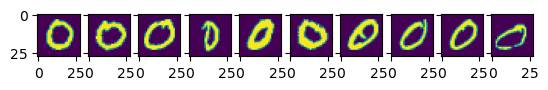

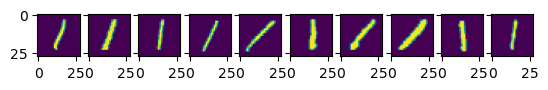

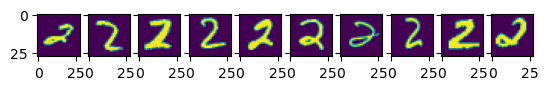

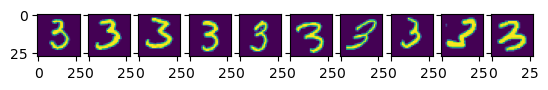

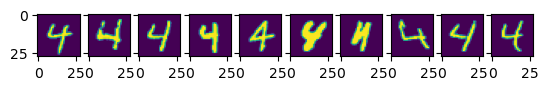

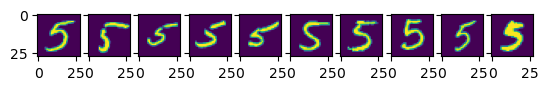

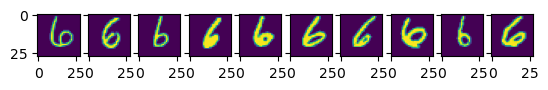

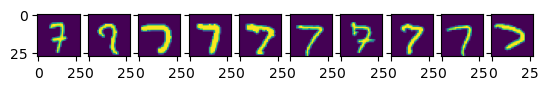

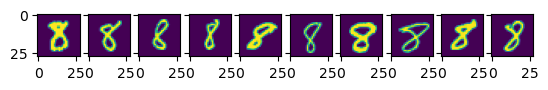

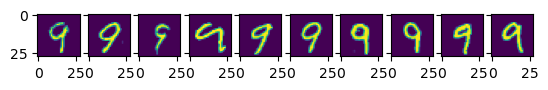

In [ ]:
#| code-fold: true
k = 10
for i in range(0,10):
    idx = np.where(y_train == i)[0] # find indices of i-digit
    fig, ax = plt.subplots(1, k, sharey=True)
    for j in range(0, k):
        ax[j].imshow(x_train[idx[j]])
    plt.show()

Before putting our images through the model, we first need to pre-process the data. We will:

1. Flatten the images
2. Normalize them $\mathbf{x}_i \to \frac{\mathbf{x}_i - \text{mean}(\mathbf{x}_i)}{\text{std}(\mathbf{x})}$
3. Because output of our network comes from a simgoid activation function in the range $(0, 1)$, we will bring the image labels $y \in \{0,1,2,\dots,9\}$ to the $(0,1)$ range dividing by 10.

In [ ]:
# Flatten the images
X_train = x_train.reshape(n_train, -1)
X_val = x_val.reshape(n_val, -1)
X_test = x_test.reshape(n_test, -1)

# Normalize the data
def normalize(x):
    return (x - np.mean(x, axis=1)[:, None])/np.std(x, axis=1)[:, None]

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

# Bring the targets in range
Y_train = y_train/10.0
Y_val = y_val/10.0
Y_test = y_test/10.0

### Define the model
Let's define now the neural network parameters

In [ ]:
# NN parameters
m = X_train.shape[1] # number of input neurons
h = 21               # number of hidden neurons
c = 1                # number of output neurons

And define a forward and a backward function to compute the output and the gradients.

In [ ]:
def forward(x, w_1, b_1, w_2):
    "Forward pass through our neural network."
    h = x @ w_1 + b_1
    h_hat = sigmoid(h)
    g = h_hat @ w_2
    return sigmoid(g), g, h_hat, h

def sigmoid(x):
    return 1/(1+np.exp(-x))

def backward(x, y, y_pred, w_2, h_hat):
    "Backward pass through our neural network."
    Q_2 = (y_pred-y[:, None])*y_pred*(1-y_pred)
    Q_1 = Q_2 @ w_2.T*h_hat*(1-h_hat)

    grad_w_1 = x.T @ Q_1
    grad_b_1 = np.sum(Q_1, axis=0)
    grad_w_2 = h_hat.T @ Q_2

    return grad_w_1, grad_b_1, grad_w_2

### Train the model

We can now train the model!

In [ ]:
# Training parameters
eta = 50      # learning rate
n_epoch = 500 # training epochs

# Initialize the weights randomly
np.random.seed(0)
w_1 = 1*(np.random.rand(m, h) - 0.5)  
w_2 = 1*(np.random.rand(h, c) - 0.5)  
b_1 = 1*(np.random.rand(h)   - 0.5)  

In [ ]:
loss_train_vs_epoch = []
loss_val_vs_epoch = []

for epoch in tqdm(range(n_epoch)):
    # Forward pass
    Y_pred, g, h_hat, h = forward(X_train, w_1, b_1, w_2)    
    loss_train = 0.5*np.mean((Y_pred.squeeze() - Y_train)**2)    
    loss_train_vs_epoch.append(loss_train)

    # Backward pass
    grad_w_1, grad_b_1, grad_w_2 = backward(X_train, Y_train, Y_pred, w_2, h_hat)

    # Update parameters 
    w_1 -= eta/n_train*grad_w_1 
    b_1 -= eta/n_train*grad_b_1
    w_2 -= eta/n_train*grad_w_2

    # Validate the performance
    Y_pred, _, _, _ = forward(X_val, w_1, b_1, w_2)
    loss_val = 0.5*np.mean((Y_pred.squeeze() - Y_val)**2)    
    loss_val_vs_epoch.append(loss_val)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#| code-fold: true
print(f"Train and validation loss of {loss_train:.5f} and {loss_val:.5f}, respectively")

Train and validation loss of 0.00625 and 0.00735, respectively


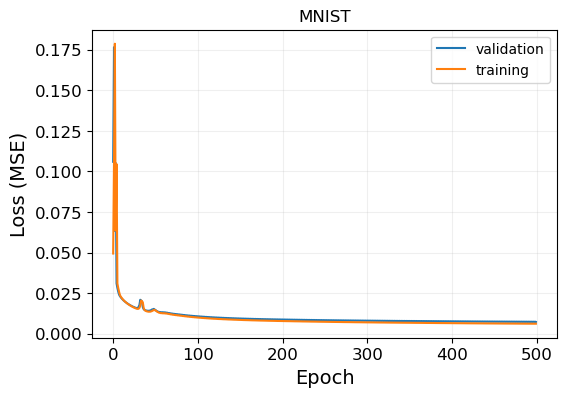

In [ ]:
#| code-fold: true
plt.figure(figsize=(6, 4))
plt.plot(loss_val_vs_epoch, label = "validation")
plt.plot(loss_train_vs_epoch, label = "training")
plt.grid(alpha=0.2)
plt.title("MNIST")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.legend()
plt.tick_params(labelsize=12);

Now, we can look at the performance over unseen data from the test set.

In [ ]:
#| code-fold: true
Y_pred, _, _, _ = forward(X_test, w_1, b_1, w_2)
loss_test = 0.5*np.mean((Y_pred.squeeze() - Y_test)**2)
print(f"The test loss is {loss_test:.5f}") 

The test loss is 0.00699


The model seems to generalize fairly well, as the performance is comparable to the one obtained in the training set. Indeed, looking at the training losses, we see that the model is barely overfitting as there is almost no difference between the training and validation loss. This is mainly due to the simplicity of the model that we are considering.

We can also pretend for a moment that this is a classification task. This is definitely not how you would frame a classification problem, but we can assign prediction intervals to the MNIST labels and see how we would do.

In [ ]:
#| hide
def get_confusion_matrix(pred, true):
    labels = np.unique(true)
    confusion_matrix = np.zeros((len(labels), len(labels)))
    for label in labels:
        idx, counts = np.unique(pred[true == label], return_counts=True)
        confusion_matrix[label, idx] = counts
    return confusion_matrix

In [ ]:
# Train set prediction
pred_train, _, _, _ = forward(X_train, w_1, b_1, w_2)
pred_train = np.around(10*pred_train).astype(int).squeeze()
true_train = (10*Y_train).astype(int)
conf_mat_train = get_confusion_matrix(pred_train, true_train)
accuracy_train = (pred_train == true_train).mean()

# Test set prediction
pred_test, _, _, _ = forward(X_test, w_1, b_1, w_2)
pred_test = np.around(10*pred_test).astype(int).squeeze()
true_test = (10*Y_test).astype(int)
conf_mat_test = get_confusion_matrix(pred_test, true_test)
accuracy_test = (pred_test == true_test).mean()

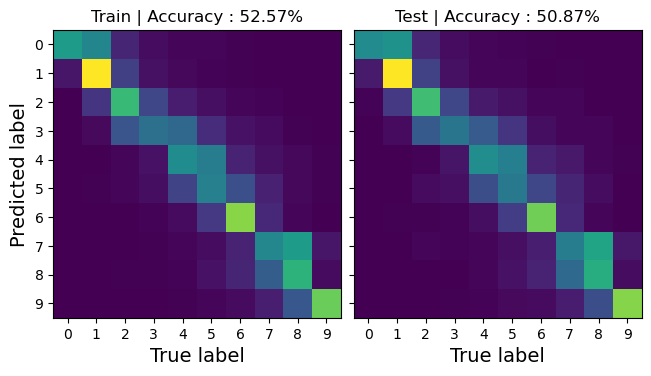

In [ ]:
#| code-fold: true
fig, ax = plt.subplots(1, 2, sharey=True, constrained_layout=True)
ax[0].imshow(conf_mat_train)
ax[0].set_title("Train | Accuracy : " + "{:2.2f}".format(accuracy_train*100) + "%")
ax[0].set_xlabel("True label", fontsize=14)
ax[0].set_ylabel("Predicted label", fontsize=14)
ax[0].set_xticks(np.arange(0, 10))
ax[0].set_yticks(np.arange(0, 10))

ax[1].imshow(conf_mat_test)
ax[1].set_title("Test | Accuracy : " + "{:2.2f}".format(accuracy_test*100) + "%")
ax[1].set_xlabel("True label", fontsize=14)
ax[1].set_xticks(np.arange(0, 10))
ax[1].set_yticks(np.arange(0, 10));

As we can see, the accuracy matrix has quite diagonal structure! With an accuracy far beyond what we would obtain from a random guess!

:::{.callout-note}
We reiterate that this is not the proper way to handle a classification task. This is just an academic experiment to get familiar with the perceptron and see that neural networks are just a bunch of affine transformations.
:::

Let's see if we can get a better understanding of the model by looking at some predictions:

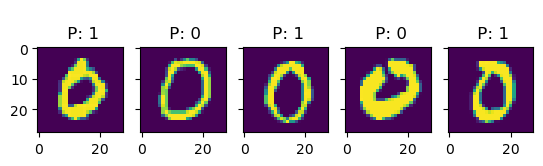

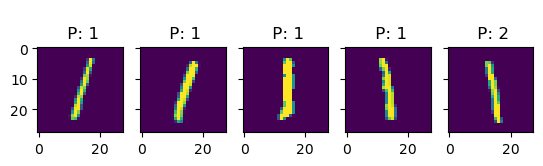

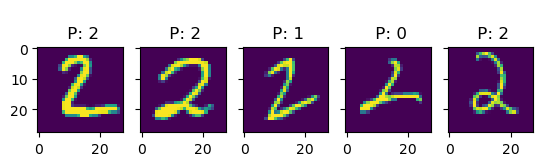

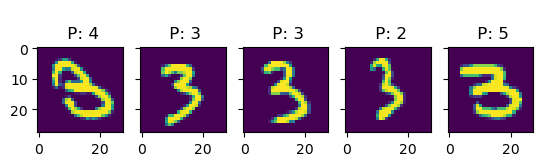

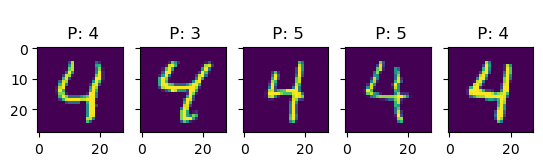

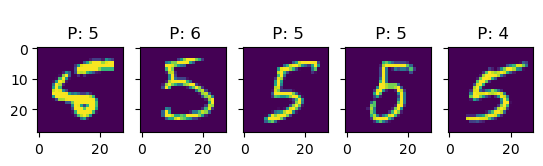

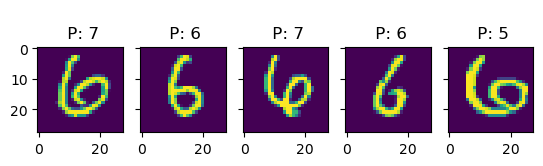

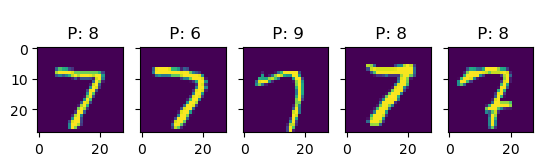

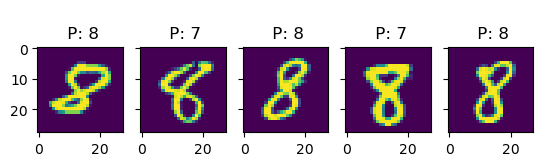

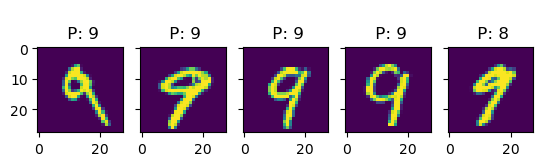

In [ ]:
#| code-fold: true
k = 5
for i in range(10):
    idx = np.where(true_test == i)[0] # find indices of i-digit
    fig, ax = plt.subplots(1, k, sharey=True)
    for j in range(k):
        title_string = "\n P: " + "{:01d}".format(int(pred_test[idx[j]]))
        ax[j].set_title(title_string)
        ax[j].imshow(X_test[idx[j], :].reshape(28, 28))
    # plt.show()

We can see that, in general, most errors occur due to categories being close to each other. For instance, all the errors in the images with gs are either 5s or 7s. This is one of the main reasons why classification problems are not framed this way, but rather we treat every class as an independent instance of the rest.

::: {.callout-tip}
### Exercise
Check training/test accuracy and confusion matrix for different numbers of training data samples.
:::

::: {.callout-tip}
### Exercise
Set initial biases to zero, and freeze its training. Check the change in the confusion matrix and accuracy.
:::

::: {.callout-tip}
### Exercise
Check prediction accuracy and confusion matrix for weights and bias initialization taken from:
1. Uniform distribution [-0.5,0.5]
2. Uniform distribution [0,1]
3. Normal distribution ${\cal N}(0,1)$
:::

::: {.callout-tip}
### Exercise
Implement function for adaptative learning rate $\eta$ with the following rule: check relative change of the training loss after 10 epochs: if it is smaller than 5%, then $\eta_{new} = \kappa\eta_{old}$, $\kappa<1$.
:::

## Activation functions

So far we have been using softmax $\sigma(z) = \frac{1}{1+e^{-x}}$ activation function only. The other activation functions are:

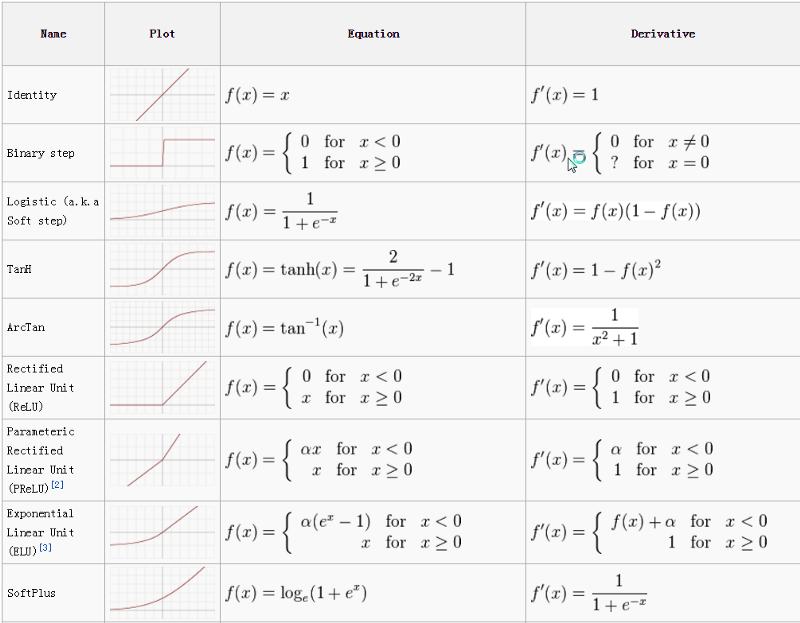

Loss function should be calculated accordignly to the given activation function!

# Optimization algorithms


There are many different optimization algorithms that can be used to train neural networks, and choosing the proper algorithm is essential to obtain a performant and well-trained model [@goodfellow:2016].

In general, optimization algorithms can be divided into two categories: 
first-order methods, which only use the gradient of the loss function with respect to the model's parameters, and second-order methods, which also use the second derivative (or Hessian matrix). Second-order methods can be more computationally expensive, but they may also be more effective in certain cases.

## Stochastic gradient descent - SGD 


In the standard gradient descent, we compute the gradient of the cost function with respect to the parameters for the entire training dataset. In most cases, it is extremely slow and even intractable for datasets that don't even fit in memory. It also doesn't allow us to update our model online, i.e. with new examples on-the-fly.

In SGD gradient descent, we use mini-batches comprised of a few training samples, and the model's parameters are updated based on the average loss across the samples in each mini-batch. This way, SGD is able to make faster progress through the training dataset, and it can also make use of vectorized operations, which can make the training process more efficient.

## Momentum

Momentum optimization is an algorithm that can be used to improve SGD. It works by adding a fraction $\gamma$ of the previous parameter update to the current one, which helps the model make faster progress in the right direction and avoid getting stuck in local minima. This fraction is called the momentum coefficient, and it is a hyperparameter that can be adjusted according to the problem.

The momentum algorithm accumulates a history of the past gradients and continues to move in their direction:

\begin{equation}
\begin{split}
 g_t &=  \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 v_t &= \gamma v_{t-1} - \eta g_t \\
 \theta &= \theta + v_t,
 \end{split}
\end{equation}
where $t$ enumerates training epoch, $\theta$ are the trainable parameters of the Neural Network, $\gamma$ is the momentum coefficient and $\eta$ is the learning rate.

The velocity $v$ accumulates the gradient of the loss function $L$; the larger $\gamma$ with respect to $\eta$, the more previous gradients affect the current direction.
In the standard SGD algorithm, the update size depended on the gradient and the learning rate. With momentum, it also depends on how large and how aligned consecutive gradients are.

The momentum algorithm can be understood as the simulation of a particle subjected to Newtonian dynamics. 
The position of particle at time $t$ is given by value of the trainable parameters $\theta(t)$. The particle experiences the net force
\begin{equation}
 f(t) = \frac{\partial^2}{\partial t^2}\theta(t),
\end{equation}
which can be expressed as a set of first time-derivatives:
\begin{equation}
\begin{split}
 v(t) = \frac{\partial}{\partial t}\theta(t) \\
 f(t) = \frac{\partial}{\partial t}v(t)
\end{split}
\end{equation}

In the momentum optimization we have two forces:
 1. One force is proportional to the negative gradient of the cost function 
 \begin{equation}
 f_1 = -\frac{\partial L(\theta)}{\partial \theta}.
 \end{equation}
 This force pushes the particle downhill along the cost function surface. 
 
 2. Second force is proportional to $-v(t)$. Physical intuition is that this force corresponds to viscous drag, as if the particle must push through a resistant medium.


  In addition to speeding up training, momentum optimization can also help the model to generalize better to new data. 

## Adaptative Gradient - Adagrad 

Adaptative Gradient algorithm [[2](https://jmlr.org/papers/v12/duchi11a.html)] is based on the idea of adapting the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

The AdaGrad algorithm works by accumulating the squares of the gradients for each parameter, and then scaling the learning rate for each parameter by the inverse square root of this sum. This has the effect of reducing the learning rate for parameters that have been updated frequently, and increasing the learning rate for parameters that have been updated infrequently.

The update rule for AdaGrad algorithm reads

\begin{equation}
 \begin{split}
 \theta_{t+1} & = \theta_t + \Delta\theta,
 \end{split}
\end{equation}

\begin{equation}
 \begin{split}
 \Delta \theta &= - \frac{\eta}{\sqrt{diag( \epsilon\mathbb{1} + G_t )}} \odot g_t,\\
 g_t &= \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 G_t &= \sum_{\tau = 1}^{t} g_\tau g_\tau^T.
 \end{split}
\end{equation}
where $\odot$ means element-wise multiplication. The $\epsilon \ll 0$ is a regularizing parameter, preventing from division by 0.

Adagrad eliminates the need to manually tune the learning rate, i.e. initially $\eta \ll 1$, and it is effectively adapted during training process. Algorithm can be sensitive to the choice of the initial learning rate, and it may require careful tuning to achieve good results.

## Adadelta: extension of the Adaptative Gradient 

Adadelta algorithm [[3](https://arxiv.org/pdf/1212.5701.pdf)] is based on the idea of adapting the learning rate to the parameters, similar to AdaGrad, but it does not require the specification of a learning rate as a hyperparameter. Adadelta uses an Exponentially Weighted Moving Average (EWMA) of the squared gradients to scale the learning rate. 
The Exponentially Weighted Moving Average (EWMA) for $x_t$ is defined recursively as:

\begin{equation}
 E[x]_t = \gamma E[x]_{t-1} + (1-\gamma) x_t
\end{equation}


In general Adadelta algorithm uses EMWA for $g_t^2$ instead  $G_t = \sum_{\tau = 1}^t g_\tau g_\tau^T$, as in Adagrad, i.e.:

\begin{equation}
 E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2,
\end{equation}
and we update parameters as
\begin{equation}
\begin{split}
 \theta_{t+1} & = \theta_t + \Delta\theta_t \\
 \Delta\theta_t & = - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}}\odot g_t.
\end{split}
\end{equation}
Let's introduce notation $RMS[g]_t = \sqrt{E[g^2]_t + \epsilon}$, where $RMS$ stands for root-mean-square.



However, Matthew D. Zeiler, the Author of Adadelta noticed that  the parameter updates $\Delta\theta$ being applied to $\theta$ shoud have matching units. Considering, that the parameter had some hypothetical units $[\theta]$, the changes to the parameter should be changes in those units as well, i.e.
\begin{equation}
 [\theta] = [\Delta\theta].
\end{equation}
However, assuming the loss function is unitless, we have
\begin{equation}
 [\Delta\theta] = \frac{1}{[\theta]},
\end{equation}
thus units do not match.
This is the case for SGD, Momentum, or Adagrad algorithms.


The second order methods such as Newton’s method that use the second derivative information preserve units for the parameter updates. For function $f(x)$, we have
\begin{equation}
 \Delta x = \frac{\frac{\partial f}{\partial x}}{\frac{\partial^2 f}{\partial x^2}},
\end{equation}
thus units $[\Delta x] = [x]$ are preserved. Keeping this in mind, the update rule in Adadelta algorithm is defined as:
\begin{equation}
 \begin{split}
  \theta_{t+1} & = \theta_t + \Delta_t\theta_t \\
  \Delta\theta_t &= -\frac{RMS[\Delta\theta]_{t-1}}{RMS[g]_t}\odot g_t.
 \end{split}
\end{equation}

This has the effect of automatically adapting the learning rate to the characteristics of the problem, which can make it easier to use than other optimization algorithms that require manual tuning of the learning rate. 


## Adaptive Moment Estimation - Adam  

Adam algorithm [[4](https://arxiv.org/pdf/1412.6980.pdf)] combines the ideas of momentum optimization and Adagrad to make more stable updates and achieve faster convergence.

Like momentum optimization, Adam uses an exponentially decaying average of the previous gradients to determine the direction of the update. This helps the model to make faster progress in the right direction and avoid oscillations. Like AdaGrad, Adam also scales the learning rate for each parameter based on the inverse square root of an exponentially decaying average of the squared gradients. This has the effect of reducing the learning rate for parameters that have been updated frequently, and increasing the learning rate for parameters that have been updated infrequently.

Adam uses Exponentially Modified Moving Average for gradients and its square:

\begin{equation}
\begin{split}
 g_t &= \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 m_t &= \beta_1 m_{t-1} + (1-\beta_1)g_t \\
 v_t &= \beta_2 v_{t-1} + (1-\beta_2)g_t^2.
\end{split}
\end{equation}

The update rule for the parameters reads:

\begin{equation}
\Delta \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon}\hat{m}_t,
\end{equation}
where
\begin{equation}
\begin{split}
\hat{m}_t &= \frac{m_t}{1-\beta_1}\\
\hat{v}_t &= \frac{v_t}{1-\beta_2},
\end{split}
\end{equation}
are bias-corrected first and second gradient moments estimates.

Authors suggest to set $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\eta = 10^{-8}$.


::: {.callout-tip}
### Exercise
Implement mini-batch SGD algorithm. In the training loop feed-forward training data with fixed size batches and update gradients after each batch. 
Steps:

1. Fix batch size $n_b$

2. Calculate number of batches $N_b = N_{train}/n_b$

3. Loop over training epochs:

    3.1. Loop over number of batches: 
    
        3.1.1 at each iteration randomly choose batch size training points from training data set
        
        3.1.2 feed-forward through network
        
        3.1.3 backpropagate and update weights
        
    3.2 Calculate loss on test dataset, and on a single batch from the training dataset
:::

# References

[1] Goodfellow, I., Bengio, Y., Courville, A. "Deep Learning", MIT Press (2016), https://www.deeplearningbook.org/

[2] Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. Journal of Machine Learning Research, 12, 2121–2159 \\

[3] Zeiler, M. D. (2012). ADADELTA: An Adaptive Learning Rate Method. Retrieved from http://arxiv.org/abs/1212.5701 

[4] Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.  https://arxiv.org/abs/1412.6980